<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망으로 IMDB 리뷰 분류하기
> 텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류하기

#### IMDB 리뷰 데이터셋
- 토큰 : 분리된 단어(영어문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리)
- 토큰마다 정수를 할당(0 : 패딩, 1 : 문장의 시작, 2 : 어휘 사전에 없는 토큰)
  > 어휘사전 : 훈련세트에서 고유한 단어를 뽑아 만든 목록

  > 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입)

In [ ]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개 사용
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열
train_input.shape, test_input.shape

((25000,), (25000,))

In [ ]:
print(len(train_input[0])), len(train_input[1])

218


(None, 189)

In [ ]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [ ]:
# 리뷰가 긍정(1)인지 부정(0)인지 판단
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [ ]:
# 각 리뷰의 길이를 계산해 넘파이 배열에 담기
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
# 리뷰 길이의 평균값과 중간값 구해보기(리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것)
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

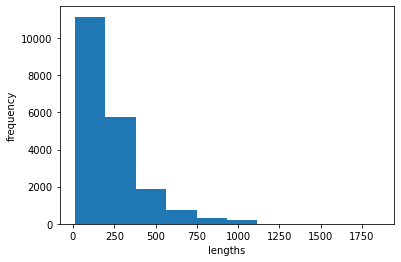

In [ ]:
# lengths배열을 히스토그램으로 표현해보기
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 100개의 단어들만 사용, 100보다 짧은 단어들은 패딩하여 100으로 맞추기
# pad_sequences() 함수를 시용하여 시퀀스 데이터의 길이를 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [ ]:
train_seq.shape

(20000, 100)

In [ ]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [ ]:
# pad_sequences() 함수는 기본으로 maxlen 보다 긴 시퀀스 앞 부분을 자름(truncating = 'post' : 뒷부분 자르기)
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

In [ ]:
# 패딩 토근은 시퀀스 앞부분에 추가, padding = 'post : 샘플의 뒷부분에 패딩 추가
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [ ]:
# 검증 세트의 길이도 100에 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

#### 순환 신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# train_seq를 원-핫 인코딩으로 변환
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
np.sum(train_oh[0][0])

1.0

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


#### 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6919 - accuracy: 0.5321 - val_loss: 0.6756 - val_accuracy: 0.5850
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6613 - accuracy: 0.6068 - val_loss: 0.6490 - val_accuracy: 0.6306
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6333 - accuracy: 0.6550 - val_loss: 0.6241 - val_accuracy: 0.6670
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6092 - accuracy: 0.6877 - val_loss: 0.6033 - val_accuracy: 0.6908
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5857 - accuracy: 0.7147 - val_loss: 0.5826 - val_accuracy: 0.7134
Epoch 6/100
313/313 [==============================] - 22s 69ms/step - loss: 0.5651 - accuracy: 0.7346 - val_loss: 0.5663 - val_accuracy: 0.7258
Epoch 7/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5477 - accuracy: 0.7481 - val_loss: 0.5522 - val_ac

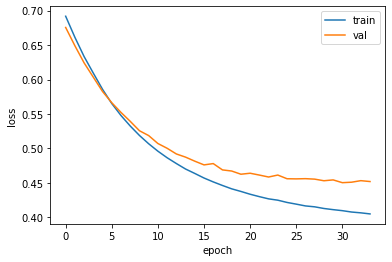

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 원-핫 인코딩은 입력 데이터가 엄청 커짐 (500배)
train_seq.shape, train_oh.shape

((20000, 100), (20000, 100, 500))

#### 단어 임베딩을 사용하기

In [ ]:
# Embedding 클래스를 SimpleRNN 층 앞에 추가한 두번째 순환 신경망 만들어 보기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) # 어휘사전 크기, 임베딩 벡터 크기, 입력 시퀀스 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights= True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 23ms/step - loss: 0.6947 - accuracy: 0.4992 - val_loss: 0.6944 - val_accuracy: 0.5014
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6915 - accuracy: 0.5218 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6886 - accuracy: 0.5483 - val_loss: 0.6917 - val_accuracy: 0.5276
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6853 - accuracy: 0.5624 - val_loss: 0.6901 - val_accuracy: 0.5330
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6811 - accuracy: 0.5833 - val_loss: 0.6876 - val_accuracy: 0.5406
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6746 - accuracy: 0.6011 - val_loss: 0.6820 - val_accuracy: 0.5668
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6539 - accuracy: 0.6604 - val_loss: 0.6457 - val_accuracy

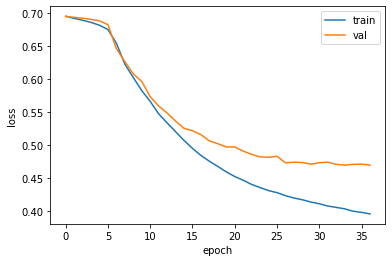

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()